<a href="https://colab.research.google.com/github/atanu22-iitk/DLCV/blob/main/Assignment_dlcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Showing Data:
File contain 0  is: b'batch_label'
File contain 1  is: b'labels'
File contain 2  is: b'data'
File contain 3  is: b'filenames'
(10000, 32, 32, 3)


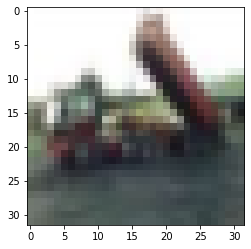

In [10]:
import numpy as np
import matplotlib.pyplot as plt



def read_data(file):
  import pickle
  data=open(file, 'rb')
  dict = pickle.load(data, encoding='bytes')
  return dict

def image_array(image_data,x):
    global R_ch,G_ch,B_ch
    R_ch=np.array([image_data[b'data'][x,:32]])
    G_ch=np.array([image_data[b'data'][x,1024:1056]])
    B_ch=np.array([image_data[b'data'][x,2048:2080]])

    for i in range(32,1024,32):
        data_R=np.array(image_data[b'data'][x,i:i+32])
        R_ch=np.append(R_ch, [data_R], axis=0)
        i+=32

    for i in range(1056,2048,32):
        data_G=np.array(image_data[b'data'][x,i:i+32])
        G_ch=np.append(G_ch, [data_G], axis=0)
        i+=32

    for i in range(2080,3072,32):
        data_B=np.array(image_data[b'data'][x,i:i+32])
        B_ch=np.append(B_ch, [data_B], axis=0)
        i+=32

    print('Red:',R_ch)
    print('Green:',G_ch)
    print('Blue:',B_ch)
    print(type(R_ch))
    
    print(R_ch.shape)
    print(G_ch.shape)
    print(B_ch.shape)
    
    image=np.dstack((R_ch,G_ch,B_ch))

    # print(image)
    # print(image[1,1][2])
    # # print(image.shape)
    # print('Original Image:')
    # plt.imshow(image)
    # plt.show()
    # plt.imshow(R_ch)
    # plt.show()
    # plt.imshow(G_ch)
    # plt.show()
    # plt.imshow(B_ch)
    # plt.show()
    return image

def img_poster(image):
  #range=r,divider=d
  sel_min=5
  sel_max=250
  r = sel_max - sel_min
  d = 255/r
  for i in range(0,32,1):
    for j in range(0,32,1):
      image[i,j][0]=(image[i,j][0]/d) + sel_min
      image[i,j][1]=(image[i,j][1]/d) + sel_min
      image[i,j][2]=(image[i,j][2]/d) + sel_min
  return image

def img_enhance(image):
  for i in range(0,32,1):
    for j in range(0,32,1):
      image[i,j][0]=((image[i,j][0]-R_min_max[0])/(R_min_max[1]-R_min_max[0]))*255
      image[i,j][1]=((image[i,j][1]-G_min_max[0])/(G_min_max[1]-G_min_max[0]))*255
      image[i,j][2]=((image[i,j][2]-B_min_max[0])/(B_min_max[1]-B_min_max[0]))*255

  return image

def min_max(arr):
  min=np.min(arr)
  max=np.max(arr)
  return min, max

def rotate(image):
  # Generate a random angle between 0 and 360
  angle = np.random.uniform(-180, 180)
  k = int(angle / 90)
  # Rotate the array
  rotated_image = np.rot90(image, k )
  # print('Rotating image by '+ str(k) +'times :')
  return rotated_image

def contrast_flipping(image):
  alpha=np.round((np.random.uniform(0.5,2.0)), 2)
  print('Changing contrast of the image by '+ str(alpha) +' factors :')
  for i in range(0,32,1):
    for j in range(0,32,1):
      image[i,j][0]=alpha*(image[i,j][0] - 128) + 128
      image[i,j][1]=alpha*(image[i,j][1] - 128) + 128
      image[i,j][2]=alpha*(image[i,j][2] - 128) + 128
  
  flipped_image=np.flip(image, axis=0)
  return image,flipped_image


def augmentation(image_data):
  Image_aug_1=[]
  Image_1=[]
  for i in range(0,10000,1):
    image = image_array(image_data,i)
    Image_1.append(image)
    sel_function = np.random.randint(1,4)
  #print(sel_function)
    if sel_function==1:
      augmented_image=img_enhance(image)
    elif sel_function==2:
      augmented_image=img_poster(image)
    elif sel_function==3:
      augmented_image=rotate(image)
    else:
      augmented_image=contrast_flipping(image)
    Image_aug_1.append(augmented_image)
    Batch1_aug=np.array(Image_aug_1)
    Batch1_original=np.array(Image_1)
  # print(Batch1_aug.shape)
  print(Batch1_original.shape)

  return  Batch1_original, Batch1_aug

def main():
    file_1='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_1'
    image_data_1=read_data(file_1)
    file_2='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_2'
    image_data_2=read_data(file_2)
    file_3='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_3'
    image_data_3=read_data(file_3)
    file_4='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_4'
    image_data_4=read_data(file_4)
    file_5='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_5'
    image_data_5=read_data(file_5)
    file_6='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/test_batch'
    image_test_6=read_data(file_6)
    print('Showing Data:')
    cnt=0
    for item in image_data_1:
      print('File contain',cnt,' is:', item)
      cnt +=1

    new_image = np.array(image_array(image_data_1,2))
    plt.imshow(new_image)
    plt.show

    print(image_data_1[b'labels'])
    labels_1 = np.array(image_data_1[b'labels'])
    np.save('labels_1.npy', labels_1)
    labels_2 = np.array(image_data_2[b'labels'])
    np.save('labels_2.npy', labels_2)
    labels_3 = np.array(image_data_3[b'labels'])
    np.save('labels_3.npy', labels_3)
    labels_4 = np.array(image_data_4[b'labels'])
    np.save('labels_4.npy', labels_4)
    labels_5 = np.array(image_data_5[b'labels'])
    np.save('labels_5.npy', labels_5)

    # print(labels_1.shape)
    # print(labels_2.shape)
    # print(labels_3.shape)
    # print(labels_4.shape)
    # print(labels_5.shape)

    global R_min_max, G_min_max, B_min_max
    R_min_max=min_max(R_ch)
    G_min_max=min_max(G_ch)
    B_min_max=min_max(B_ch)
    # print('Rmin:',R_min_max[0])
    # print('Rmax:',R_min_max[1])
    # print('Gmin:',G_min_max[0])
    # print('Gmax:',G_min_max[1])
    # print('Bmin:',B_min_max[0])
    # print('Bmax:',B_min_max[1])

    Enhanced_image=img_enhance(new_image)
    print('Enhanced Image:')
    plt.imshow(Enhanced_image)
    plt.show()
    print(Enhanced_image[1,1][2])

    Posterize_image=img_poster(new_image)
    print('Posterized Image:')
    plt.imshow(Posterize_image)
    plt.show() 
    print(Posterize_image[1,1][2])

  # Navneet sir enter your code here
    print('Rotated Image:')
    plt.imshow(rotate(new_image))
    plt.show()

    Edited_image = contrast_flipping(new_image) # this will not be reqd after your part
    print('Edited Image:')
    plt.imshow(Edited_image[0])
    plt.show()
  # Navneet sir enter your code here
    print('Flipped Image:')
    plt.imshow(Edited_image[1])
    plt.show()

    ImageSet_1 = augmentation(image_data_1)
    np.save('ImageSet_original_1.npy',ImageSet_1[0])
    np.save('ImageSet_augmented_1.npy',ImageSet_1[1])

    ImageSet_2 = augmentation(image_data_2)
    np.save('ImageSet_original_2.npy',ImageSet_2[0])
    np.save('ImageSet_augmented_2.npy',ImageSet_2[1])

    ImageSet_3 = augmentation(image_data_3)
    np.save('ImageSet_original_3.npy',ImageSet_3[0])
    np.save('ImageSet_augmented_3.npy',ImageSet_3[1])

    ImageSet_4 = augmentation(image_data_4)
    np.save('ImageSet_original_4.npy',ImageSet_4[0])
    np.save('ImageSet_augmented_4.npy',ImageSet_4[1])

    ImageSet_5 = augmentation(image_data_5)
    np.save('ImageSet_original_5.npy',ImageSet_5[0])
    np.save('ImageSet_augmented_5.npy',ImageSet_5[1])

    ImageSet_6 = augmentation(image_test_6)
    np.save('ImageSet_test_5.npy',ImageSet_6[0])
    

# driver code
if __name__ == "__main__":
    
  # function call
  main()






Rotation of Image

In [ ]:
import math

def rotate_matrix(matrix, angle):
    # Define the rotation matrix
    rotation_matrix = [[math.cos(angle), -math.sin(angle)],
                       [math.sin(angle), math.cos(angle)]]
    # Transpose the matrix
    transposed_matrix = [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
    # Apply rotation to each pixel
    rotated_matrix = [[0 for j in range(len(matrix))] for i in range(len(matrix[0]))]
    for i in range(len(transposed_matrix)):
        for j in range(len(transposed_matrix[0])):
            rotated_matrix[i][j] = [0, 0, 0]
            for k in range(3):
                rotated_matrix[i][j][k] = transposed_matrix[i][j][0] * rotation_matrix[0][0] + transposed_matrix[i][j][1] * rotation_matrix[0][1]
    # Transpose the matrix back
    result = [[rotated_matrix[j][i] for j in range(len(rotated_matrix))] for i in range(len(rotated_matrix[0]))]
    return result

Flipping of Image

In [ ]:
def flip_image(image):
  rows, cols, _ = image.shape
  result = [[None] * cols for _ in range(rows)]
  for row in range(rows):
    for col in range(cols):
      result[row][cols - col - 1] = image[row][col]
  return result

Random Image Selection

In [ ]:
# def rand_img_sel(image_data):
  
#   x=np.random.randint(1,10000)
#   R_ch_x=np.array([image_data[b'data'][x,:32]])
#   G_ch_x=np.array([image_data[b'data'][x,1024:1056]])
#   B_ch_x=np.array([image_data[b'data'][x,2048:2080]])

#   for i in range(32,1024,32):
#         data_R=np.array(image_data[b'data'][x,i:i+32])
#         R_ch_x=np.append(R_ch, [data_R], axis=0)
#         i+=32

#   for i in range(1056,2048,32):
#         data_G=np.array(image_data[b'data'][x,i:i+32])
#         G_ch_x=np.append(G_ch, [data_G], axis=0)
#         i+=32

#   for i in range(2080,3072,32):
#         data_B=np.array(image_data[b'data'][x,i:i+32])
#         B_ch_x=np.append(B_ch, [data_B], axis=0)
#         i+=32
#   rand_image=np.dstack((R_ch_x,G_ch_x,B_ch_x))
#   return rand_image

Feature Extraction and MLP Implementation

Type of labels <class 'list'>
label 1: [6, 9, 9, 4, 1]
Type of Num Class: <class 'numpy.ndarray'>
First of Num Class: airplane
Initial weights: [[ 0.0685229  -0.00112073 -0.02332944 ... -0.08372669  0.02602194
  -0.03122294]
 [-0.04442897 -0.03186072  0.06514004 ... -0.02900776  0.00285199
  -0.01801457]
 [ 0.03024887  0.03938693 -0.07278521 ...  0.09559967 -0.0393502
   0.06744306]
 ...
 [ 0.05390039  0.07790926  0.0372905  ... -0.06459686 -0.05078359
   0.0699387 ]
 [-0.06223471  0.03590089  0.01315583 ...  0.09457809  0.05087261
  -0.00449357]
 [ 0.00932708  0.0049973   0.01570302 ...  0.09182949 -0.02865038
  -0.0277796 ]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.90100288 0.21727976 0.42029614 ... 0.20347017 0.60266501 0.23345228]
 [0.85940541 0.61389469 0.76541279 ... 0.93013631 0.04371019 0.77569

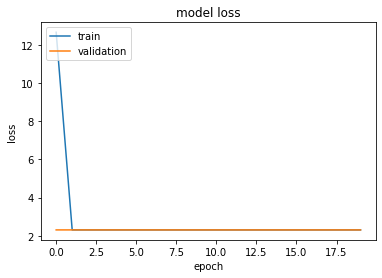

Initial weights: [[-0.04994671 -0.01046126  0.09234141 ...  0.08445731  0.04367806
  -0.07498464]
 [-0.00081354  0.0015709   0.01750182 ...  0.04464191 -0.06458928
   0.05834657]
 [-0.08474979 -0.03201833 -0.08967852 ...  0.05979738 -0.086
  -0.0461266 ]
 ...
 [ 0.03530079 -0.05135918 -0.09078224 ...  0.03769748  0.03457922
   0.02860409]
 [-0.02963807 -0.00400127  0.0829602  ...  0.08428033 -0.03047157
   0.04087976]
 [-0.08564121  0.00349738  0.00966086 ...  0.00779253 -0.06384793
   0.09873039]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.98916675 0.62171576 0.1982276  ... 0.73920287 0.89927598 0.29012768]
 [0.85072223 0.58730963 0.38120983 ... 0.93508003 0.02346922 0.05797144]
 [0.44580746 0.15518439 0.38829391 ... 0.02362578 0.73095192 0.06262628]
 ...
 [0.1155872  0.17267095 0.19613387 ... 0.0889052

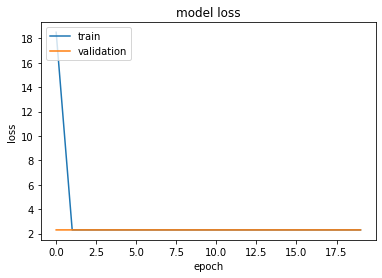

Initial weights: [[-0.06645293  0.08900474 -0.00708064 ...  0.07053222  0.05861571
  -0.00784186]
 [-0.02280175  0.05966665  0.07176349 ... -0.05209665 -0.06518929
  -0.05794255]
 [-0.00983594 -0.09242614  0.00607722 ... -0.02340551  0.0469798
  -0.06189492]
 ...
 [ 0.03684524 -0.05950747  0.04375647 ... -0.0766891   0.0937105
  -0.08510567]
 [ 0.01182695 -0.07176182  0.04778165 ...  0.04279627 -0.01595686
  -0.0106981 ]
 [-0.0235967  -0.05655954 -0.0933492  ...  0.09093647 -0.0081315
   0.00256427]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.94619169 0.86960253 0.90064012 ... 0.78214408 0.65033305 0.07497314]
 [0.70129589 0.99680761 0.8747048  ... 0.9048678  0.27400411 0.08453897]
 [0.43723876 0.82996029 0.71640024 ... 0.24234272 0.39236521 0.21150229]
 ...
 [0.94696459 0.00494015 0.29787978 ... 0.93044

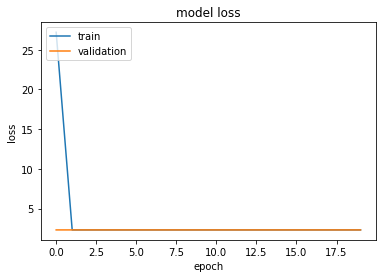

Initial weights: [[-0.05377651  0.03228767 -0.07400247 ...  0.00659496 -0.01776793
   0.08049905]
 [-0.09832917  0.06266519 -0.09370661 ...  0.05286425 -0.03448129
  -0.08678137]
 [-0.03238552  0.01704756 -0.03154813 ...  0.03612287  0.00781227
  -0.05614728]
 ...
 [ 0.02451155  0.04872441 -0.09728926 ... -0.09252799 -0.01170872
   0.03783961]
 [ 0.04540226 -0.04207721 -0.03928969 ...  0.03520684 -0.0551533
  -0.00503521]
 [ 0.01353472  0.06394777  0.08972625 ... -0.0445868  -0.03503963
  -0.01199514]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.43609936 0.22158871 0.70299088 ... 0.43589935 0.61905277 0.95963444]
 [0.76334838 0.2491247  0.38134632 ... 0.63753455 0.64653434 0.76892224]
 [0.57719297 0.75272228 0.94761989 ... 0.49217269 0.62582773 0.84405983]
 ...
 [0.40949991 0.29119799 0.02627026 ... 0.498

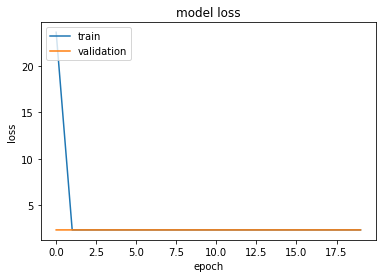

Initial weights: [[-0.04729171  0.05496292  0.09999278 ...  0.00962076  0.06102037
   0.07489249]
 [-0.01234891  0.01675919 -0.05809396 ...  0.03796262  0.07067692
   0.0439841 ]
 [ 0.04994898 -0.01590861 -0.08326104 ... -0.06244038  0.08354044
   0.09938647]
 ...
 [ 0.01893299 -0.03740469  0.04005867 ... -0.01034385  0.02336971
  -0.02254209]
 [ 0.06071518  0.00637645 -0.05779972 ... -0.09687118  0.04219039
   0.06401911]
 [ 0.00322322  0.03778867  0.02653286 ... -0.09006919  0.09612891
   0.04431565]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.42572225 0.78774033 0.95126625 ... 0.8087323  0.74452285 0.63544928]
 [0.3917511  0.26391921 0.97220609 ... 0.03178966 0.60294215 0.74046375]
 [0.12388193 0.09712358 0.17339318 ... 0.90836697 0.50791425 0.87245312]
 ...
 [0.3744669  0.95480265 0.71002713 ... 0.63

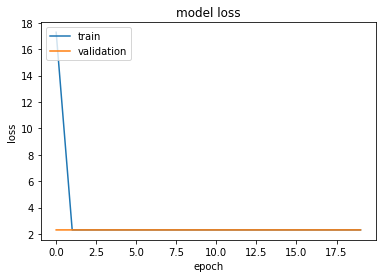

Initial weights: [[ 0.03317986 -0.05695581  0.01034461 ...  0.05606002 -0.03275841
   0.05803004]
 [ 0.05723208 -0.0218351   0.06265643 ...  0.07926385 -0.06481214
  -0.02968835]
 [-0.09255048 -0.08466509  0.00248007 ... -0.0876448  -0.05630343
  -0.00937618]
 ...
 [ 0.00585525  0.06307368  0.045761   ... -0.04385022  0.09547906
   0.06273693]
 [ 0.02403252 -0.01965278  0.09548496 ... -0.07023506  0.08129419
   0.01604441]
 [-0.07224688  0.0237319   0.01038118 ... -0.03099515  0.09640235
   0.06341136]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.06089649 0.51639244 0.66940611 ... 0.95036269 0.54930377 0.95856536]
 [0.54466295 0.0835518  0.94887023 ... 0.95579994 0.07144177 0.35057367]
 [0.39203219 0.24499592 0.88634597 ... 0.39734594 0.38441968 0.81253824]
 ...
 [0.8693186  0.58989004 0.97349375 ... 0.15

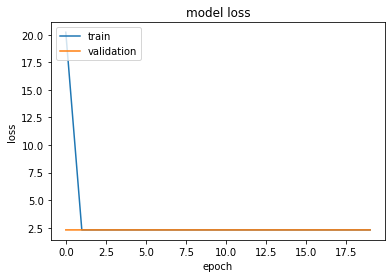

Initial weights: [[ 0.09223898 -0.03376535 -0.03076888 ... -0.05322984 -0.00756395
   0.05209723]
 [ 0.08742    -0.04605978  0.09040956 ... -0.0101934   0.08588867
  -0.02452692]
 [-0.01209618  0.00812177  0.02863353 ...  0.08497556  0.00843268
  -0.04829778]
 ...
 [-0.05456845 -0.04864623  0.06200895 ...  0.02750067 -0.05611815
  -0.05320068]
 [-0.00675274 -0.0227679  -0.09111855 ...  0.09605384 -0.05936249
   0.00536838]
 [ 0.00850599  0.07038014  0.09467784 ... -0.05014301  0.01663418
   0.01892827]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.50899321 0.30506506 0.99687604 ... 0.33275581 0.43839913 0.0651149 ]
 [0.092804   0.85486236 0.03165862 ... 0.53859902 0.51208707 0.78278977]
 [0.61886521 0.00768714 0.24042734 ... 0.40920094 0.47820345 0.19247651]
 ...
 [0.87860129 0.20127017 0.80166461 ... 0.19

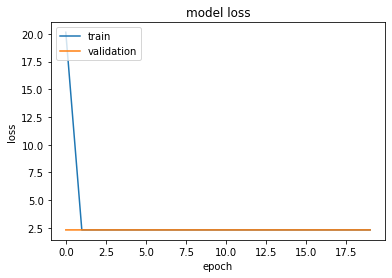

Initial weights: [[-0.04255522 -0.07375932  0.03202292 ...  0.03234382 -0.1018705
   0.00998554]
 [-0.05970939 -0.05473017  0.03411493 ...  0.0636216   0.05429019
   0.02232649]
 [ 0.07214531  0.04591949  0.04706667 ... -0.09031841 -0.03107555
   0.04330152]
 ...
 [ 0.02986282  0.07130612 -0.09584759 ... -0.08471336 -0.08466808
   0.05681929]
 [-0.05933239 -0.02964662  0.06577142 ... -0.01218456  0.09445611
  -0.06702073]
 [ 0.05057916  0.06577241  0.07505091 ... -0.0645198   0.02068483
  -0.03896703]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.02902614 0.93548836 0.66107916 ... 0.02318599 0.2899842  0.92185035]
 [0.19788396 0.5507946  0.93272711 ... 0.82947789 0.09734815 0.40116803]
 [0.17207789 0.82247463 0.39556271 ... 0.85333024 0.42442179 0.88726283]
 ...
 [0.17292215 0.59621707 0.18171158 ... 0.364

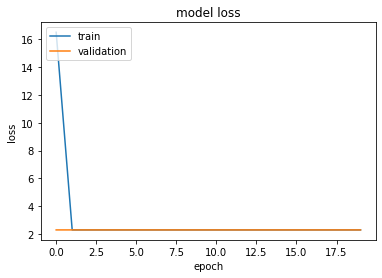

Initial weights: [[ 0.03667352  0.03395978 -0.062722   ...  0.04290603  0.08093342
   0.03706519]
 [ 0.04338397 -0.01183122  0.05989857 ... -0.05128917  0.01146621
   0.09297436]
 [-0.06430897  0.05868144  0.09540938 ...  0.04400839  0.06356096
   0.02856137]
 ...
 [-0.07700955 -0.05393614  0.09892865 ...  0.0717341   0.06041333
   0.08461404]
 [ 0.05414252  0.01656926 -0.05782154 ... -0.02563339 -0.04168182
   0.06608348]
 [-0.07847834  0.00521425  0.0136053  ... -0.02945141 -0.01523664
   0.06364323]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.75861491 0.20652007 0.12748219 ... 0.88906524 0.40341966 0.70792488]
 [0.79192917 0.75371004 0.49572543 ... 0.93652273 0.04679482 0.13652002]
 [0.06525937 0.21954412 0.66930903 ... 0.15138615 0.49705557 0.85563326]
 ...
 [0.43224854 0.95101723 0.8152874  ... 0.07

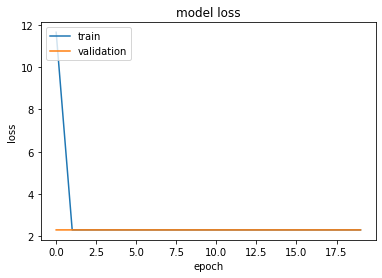

Initial weights: [[ 0.0306069   0.04813954  0.08504237 ...  0.01017252 -0.09295473
   0.07683593]
 [ 0.01229868 -0.06698844  0.04980363 ... -0.05111672 -0.03829184
   0.06075855]
 [-0.01633082  0.07839493 -0.09344466 ... -0.02878964  0.02661121
   0.02638739]
 ...
 [ 0.0662491  -0.04035812  0.08364093 ... -0.07668976  0.08186933
   0.09807202]
 [-0.09810098  0.09235406 -0.01397723 ... -0.03440109 -0.01113815
   0.0523589 ]
 [ 0.09268454  0.09946001  0.09010483 ...  0.02225583 -0.0013564
  -0.00604702]]
Initial biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Weight: [[0.7322574  0.66086063 0.51145282 ... 0.41003184 0.45613556 0.58534502]
 [0.33784185 0.61825436 0.93709317 ... 0.51106402 0.0098072  0.25266597]
 [0.92243153 0.71603685 0.68200966 ... 0.77678045 0.77499687 0.5538864 ]
 ...
 [0.72618968 0.01569027 0.35270776 ... 0.040

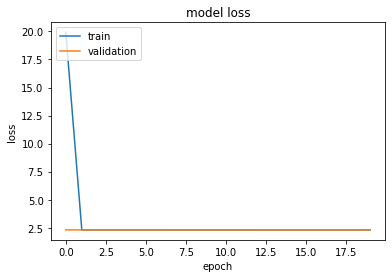

['loss', 'accuracy']
[2.3028032779693604, 0.10000000149011612]


In [6]:
from tensorflow.python.ops.gen_array_ops import tensor_strided_slice_update_eager_fallback

from keras.optimizers.optimizer_v2.optimizer_v2 import learning_rate_schedule
import os
import numpy as np
from PIL import Image
import pandas as pd
import torch
import torchvision
import torch.nn as nn
from torchvision import models
from torchvision.models import resnet18
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from matplotlib import pyplot as plt


def read_data(file):
  import pickle
  data=open(file, 'rb')
  dict = pickle.load(data, encoding='bytes')
  return dict



def get_name_to_module(model):
    name_to_module = {}
    for m in model.named_modules():
        name_to_module[m[0]] = m[1]
    return name_to_module


def get_activation(all_outputs, name):
    def hook(model, input, output):
        all_outputs[name] = output.detach()

    return hook


def add_hooks(model, outputs, output_layer_names):
    """
    :param model:
    :param outputs: Outputs from layers specified in `output_layer_names` will be stored in `output` variable
    :param output_layer_names:
    :return:
    """
    name_to_module = get_name_to_module(model)
    for output_layer_name in output_layer_names:
        name_to_module[output_layer_name].register_forward_hook(get_activation(outputs, output_layer_name))


class ModelWrapper(nn.Module):
    def __init__(self, model, output_layer_names, return_single=True):
        super(ModelWrapper, self).__init__()
        
        self.model = model
        self.output_layer_names = output_layer_names
        self.outputs = {}
        self.return_single = return_single
        add_hooks(self.model, self.outputs, self.output_layer_names)

    def forward(self, images):
        self.model(images)
        output_vals = [self.outputs[output_layer_name] for output_layer_name in self.output_layer_names]
        if self.return_single:
            return output_vals[0]
        else:
            return output_vals

class BBResNet18(object):
    def __init__(self):
        self.model = resnet18(pretrained=True)
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.model.eval()

        self.model = ModelWrapper(self.model, ['avgpool'], True)

        self.model.eval()
        self.model.to(self.device)

    def feature_extraction(self, x:np.ndarray):
        '''
            param:
                x: numpy ndarray of shape: [None, 3, 224, 224] and dtype: np.float32
            
            return:
                numpy ndarray (feature vector) of shape: [None, 512] and dtype: np.float32
        '''
        
        x = torch.from_numpy(x).to(self.device)
        
        with torch.no_grad():
            out = self.model(x).cpu().detach()
            out = out.view(out.size(0), -1)
            out = out.numpy()

        return out

    def feature_resize(file,x):
        X_train = file
        features=[]
        for i in range(len(X_train)//1000):
          batches=[]
          for j in range(1,1001,1):
            img_resized = np.resize(X_train[j-1],(3,224,224))
            batches.append(img_resized)
         
          batches=np.array(batches)
          batches = batches.astype('float32')

          Model=BBResNet18()
          feature_extract=Model.feature_extraction(batches)
          features.append(feature_extract)
        print(len(features))
        features=np.array(features)
        np.save(('feature_set_'+str(x)+'.npy'),features)
        
    
        return features   
    
      
      
      
    
    
  

    

# class Layer:
#     # ouput = layer.forward(input)
#     # grad_input = layer.backward(input, grad_output)

#     def __init__(self):
#       pass
#     def forward(self, input):
#       return input
#     def backward(self, input, grad_output):
#       num_units = input.shape[1]
#       d_layer_d_input = np.eye(num_units)
#       return np.dot(grad_output, d_layer_d_input)
# class Dense(Layer):
#   def __init__(self, input_units, output_units, learning_rate=0.1):
#       self.learning_rate = learning_rate
#       self.weights = np.random.normal(loc=0.0,
#                         scale = np.sqrt(2/(input_units+output_units)),
#                         size = (input_units,output_units))
#       self.biases = np.zeros(output_units)
        
#   def forward(self,input):
#       return np.dot(input,self.weights) + self.biases

#   def backward(self,input,grad_output):
#       grad_input = np.dot(grad_output, self.weights.T)
#       grad_weights = np.dot(input.T, grad_output)
#       grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
#       assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
#       self.weights = self.weights - self.learning_rate * grad_weights
#       self.biases = self.biases - self.learning_rate * grad_biases
        
#       return grad_input
# class ReLU(Layer):
#   def __init__(self):
#       pass

#   def forward(self, input):
#       relu_forward = np.maximum(0,input)
#       return relu_forward

#   def backward(self, input, grad_output):
#       relu_grad = input > 0
#       return grad_output*relu_grad






def main():
  
  file_1=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_1.npy')
  file_2=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_1.npy')
  file_3=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_2.npy')
  file_4=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_2.npy')
  file_5=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_3.npy')
  file_6=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_3.npy')
  file_7=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_4.npy')
  file_8=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_4.npy')
  file_9=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_5.npy')
  file_10=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_5.npy')
  dataset_original=np.concatenate((file_1,file_3,file_5,file_7,file_9), axis=1)
  dataset_augmented=np.concatenate((file_2,file_4,file_6,file_8,file_10), axis=1)
  labels_1=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_1.npy')
  labels_2=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_2.npy')
  labels_3=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_3.npy')
  labels_4=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_4.npy')
  labels_5=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_5.npy')
  label_1=labels_1.tolist()
  label_2=labels_2.tolist()
  label_3=labels_3.tolist()
  label_4=labels_4.tolist()
  label_5=labels_5.tolist()
  labels=label_1+label_1+label_2+label_2+label_3+label_3+label_4+label_4+label_5+label_5
  # print('Shape of dataset_original',dataset_original.shape)
  # print('Shape of dataset_augmented',dataset_augmented.shape)
  #print('Shape of labels',labels.shape)
  print('Type of labels',type(label_1))
  print('label 1:',labels[:5])

  test_data='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/test_batch'
  image_data_1=read_data(test_data)
  test_data_1 = np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_test_5.npy')
  test_labels_1=np.array(image_data_1[b'labels'])

  # feature_set=[]
  # test_set=[]
  # test_set.append(BBResNet18.feature_resize(test_data_1,10))
  # test_set=np.array(test_set)
  #np.save('feature_test_set.npy', test_set)
  # for j,i in zip(range(5),range(0,10,2)):
  #   feature_set.append(BBResNet18.feature_resize((dataset_original[j]),i))
  #   feature_set.append(BBResNet18.feature_resize((dataset_augmented[j]),i+1))
  # feature_set=np.array(feature_set)
  # np.save('Feature_set.npy',feature_set)
  # print('Feature vector size:',len(feature_set))
  # print('Feature vector shape:',feature_set.shape)
    
  classes='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/batches.meta'
  image_data_1=read_data(classes)
  classes_1=image_data_1[b'label_names']
  name=[]
  for i in range(10):
    classes=classes_1[i].decode()
    name.append(classes)
  num_classes=np.array(name)
  print('Type of Num Class:',type(num_classes))
  print('First of Num Class:',(num_classes[0]))

  ############
  from keras.models import Sequential
  from keras.layers import Dense, Activation
  from keras.optimizers import gradient_descent_v2

####
  class ReLU():
    def __init__(self):
      pass

    def forward(self, input):
      relu_forward = np.maximum(0,input)
      return relu_forward

    def backward(self, input, grad_output):
      relu_grad = input > 0
      return grad_output*relu_grad

  def binary_crossentropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss.mean()

  def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


  def feedforward(x, weights1, biases1, weights2, biases2, weights3, biases3):
    z1 = np.dot(x, weights1) + biases1
    a1 = ReLU.forward(z1)
    z2 = np.dot(a1, weights2) + biases2
    a2 = ReLU.forward(z2)
    z3 = np.dot(a2, weights3) + biases3
    output = softmax(z3)
    return output

  def gradients(weights, biases, X_train, y_train):
    # Calculate the dot product of the inputs and weights
    weighted_sum = np.dot(X_train, weights) + biases
    
    # Pass the dot product through the activation function (sigmoid)
    y_pred = softmax(weighted_sum)
    
    # Calculate the error (binary cross-entropy loss)
    loss = binary_crossentropy(y_train, y_pred)
    
    # Calculate the gradient of the error with respect to the weights
    d_weights = np.dot(X_train.T, (y_pred - y_train))
    
    # Calculate the gradient of the error with respect to the biases
    d_biases = np.sum(y_pred - y_train, axis=0)
    
    return d_weights, d_biases, loss
    d_weights, d_biases, loss = gradients(weights, biases, X, y_true)
    print("Gradient of weights:", d_weights)
    print("Gradient of biases:", d_biases)
    print("Loss:", loss)
###SGD Implementation####
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse
def sigmoid_activation(x):
	# compute the sigmoid activation value for a given input
	return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
	# compute the derivative of the sigmoid function ASSUMING
	# that the input "x" has already been passed through the sigmoid
	# activation function
	return x * (1 - x)
 def predict(X, W):
	# take the dot product between our features and weight matrix
	preds = sigmoid_activation(X.dot(W))
	# apply a step function to threshold the outputs to binary
	# class labels
	preds[preds <= 0.5] = 0
	preds[preds > 0] = 1
	# return the predictions
	return preds
  def next_batch(X, y, batchSize):
	# loop over our dataset "X" in mini-batches, yielding a tuple of
	# the current batched data and labels
	for i in np.arange(0, X.shape[0], batchSize):
		yield (X[i:i + batchSize], y[i:i + batchSize])
    # construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-e", "--epochs", type=float, default=100,
	help="# of epochs")
ap.add_argument("-a", "--alpha", type=float, default=0.01,
	help="learning rate")
ap.add_argument("-b", "--batch-size", type=int, default=32,
	help="size of SGD mini-batches")
args = vars(ap.parse_args())
  # generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))
# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.5, random_state=42)
# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
	# initialize the total loss for the epoch
	epochLoss = []
	# loop over our data in batches
	for (batchX, batchY) in next_batch(trainX, trainY, args["batch_size"]):
		# take the dot product between our current batch of features
		# and the weight matrix, then pass this value through our
		# activation function
		preds = sigmoid_activation(batchX.dot(W))
		# now that we have our predictions, we need to determine the
		# "error", which is the difference between our predictions
		# and the true values
		error = preds - batchY
		epochLoss.append(np.sum(error ** 2))
		# the gradient descent update is the dot product between our
		# (1) current batch and (2) the error of the sigmoid
		# derivative of our predictions
		d = error * sigmoid_deriv(preds)
		gradient = batchX.T.dot(d)
		# in the update stage, all we need to do is "nudge" the
		# weight matrix in the negative direction of the gradient
		# (hence the term "gradient descent" by taking a small step
		# towards a set of "more optimal" parameters
		W += -args["alpha"] * gradient
	# update our loss history by taking the average loss across all
	# batches
	loss = np.average(epochLoss)
	losses.append(loss)
	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))
  # evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)
# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, args["epochs"]), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

####
  X_test=np.reshape((np.load('/content/drive/MyDrive/Colab Notebooks/Test_data/feature_set_10.npy')),(10000,512))
  X_test=X_test.astype('float32')
  Y_test=test_labels_1
  X_test /=255
  Y_test=keras.utils.to_categorical(Y_test,10)
  for i in range(10):
    feature_set=np.load('/content/drive/MyDrive/Colab Notebooks/Features/feature_set_'+str(i)+'.npy')
    #print('Shape of feature_set:',feature_set.shape) 
    X_train=np.reshape((feature_set),(10000,512))
    labels=np.array(labels)
    y_train=np.reshape(labels, (10,10000))
    #print('First element of Ytrain:',y_train[0])
    Y_train=y_train[0]
    X_train=X_train.astype('float32')
  
  # print(X_train.shape)
  # print(Y_train.shape)
  # print(X_test.shape)
  # print(Y_test.shape)
  # print(X_test.dtype)
  # print(X_train.dtype)
    X_train /=255
  
###########
  # print('Example training images and their labels: ' + str([x for x in Y_test[0:5]])) 
  # print('Corresponding classes for the labels: ' + str([num_classes[x] for x in Y_test[0:5]]))

  # f, axarr = plt.subplots(1, 5)
  # f.set_size_inches(32, 16)

  # for i in range(5):
  #   img = test_data_1[i]
  #   axarr[i].imshow(img)
  # plt.show()
############
    Y_train=keras.utils.to_categorical(Y_train,10)

    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=512))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
#####
    # Access the initial weights and biases of the first layer
    weights, biases = model.layers[0].get_weights()
    print("Initial weights:", weights)
    print("Initial biases:", biases)

    # Update the weights and biases
    weights_1 = np.random.rand(512,64)
    biases_1 = np.random.rand(64)
    weights_2 = np.random.rand(64,64)
    biases_2 = np.random.rand(64)
    weights_3 = np.random.rand(64,10)
    biases_3 = np.random.rand(10)
    print('New Weight:',weights_1)
    print('New biases:',biases_1)
    model.layers[0].set_weights([weights_1, biases_1])
    model.layers[1].set_weights([weights_2, biases_2])
    model.layers[2].set_weights([weights_3, biases_3])

    # Use the predict method to get the predicted output
    y_pred = model.predict(X_train)

    # Round the predicted output to get the binary classification
    y_pred = np.round(y_pred)

    # Calculate the error by subtracting the predicted output from the actual output
    error = y_pred - Y_train
    print('Error for this epoch:',error.shape)
    # calculate binary cross entropy--- see function defined above
#####
    d_weights, d_biases, loss = gradients(weights, biases, X_train, Y_train)
    sgd = gradient_descent_v2.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)

    model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
  
    history = model.fit(X_train,Y_train, epochs=20, batch_size=512, verbose=1, validation_split=0.2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

  score = model.evaluate(X_test, Y_test, batch_size=512, verbose=0)
  print(model.metrics_names)
  print(score)
############
#   from sklearn import svm
# # Train the SVM classifier
#   for i in range(10):
#     feature_set=np.load('/content/drive/MyDrive/Colab Notebooks/Features/feature_set_'+str(i)+'.npy')
#     X_train=np.reshape((feature_set),(10000,512))
#     clf = svm.SVC(kernel='rbf', C=1, gamma='scale')
#     clf.fit(X_train, Y_train)
# # Validate the classifier
#   accuracy = clf.score(X_test, Y_test)
#   print("SVM Accuracy:", accuracy)
# # Make predictions
#   y_pred = clf.predict(X_test)

# ######

#   from sklearn.neighbors import KNeighborsClassifier
#   for i in range(10):
#     feature_set=np.load('/content/drive/MyDrive/Colab Notebooks/Features/feature_set_'+str(i)+'.npy')
#     X_train=np.reshape((feature_set),(10000,512))
#     knn5 = KNeighborsClassifier(n_neighbors = 5)
#     knn1 = KNeighborsClassifier(n_neighbors=1)
#     knn5.fit(X_train, Y_train)
#     knn1.fit(X_train, Y_train)

#   y_pred_5 = knn5.predict(X_test)
#   y_pred_1 = knn1.predict(X_test)

#   from sklearn.metrics import accuracy_score
#   print("KNN Accuracy with k=5", accuracy_score(Y_test, y_pred_5)*100)
#   print("KNN Accuracy with k=1", accuracy_score(Y_test, y_pred_1)*100)

# #######

#   from sklearn.linear_model import LogisticRegression
#   from sklearn import preprocessing
#   #from sklearn.inspection import DecisionBoundaryDisplay
#   for i in range(10):
#     feature_set=np.load('/content/drive/MyDrive/Colab Notebooks/Features/feature_set_'+str(i)+'.npy')
#     X_train=np.reshape((feature_set),(10000,512))
#     scaler = preprocessing.StandardScaler().fit(X_train) 
#     X_scaled = scaler.transform(X_train)
#     logreg = LogisticRegression(C=1e5)
#     logreg.fit(X_scaled, Y_train)
#   predictions = logreg.predict(X_test)
#   score = logreg.score(X_test, Y_test)
#   print('Logistic Regression Accuracy:',score)


# #####
#   import pandas as pd
#   from sklearn.tree import DecisionTreeClassifier
#   from sklearn.model_selection import train_test_split
#   from sklearn import metrics

#   for i in range(10):
#     feature_set=np.load('/content/drive/MyDrive/Colab Notebooks/Features/feature_set_'+str(i)+'.npy')
#     X_train=np.reshape((feature_set),(10000,512))
# # Create Decision Tree classifer object
#     clf = DecisionTreeClassifier()

# # Train Decision Tree Classifer
#     clf = clf.fit(X_train,Y_train)

# #Predict the response for test dataset
#   y_pred = clf.predict(X_test)

#   # Model Accuracy, how often is the classifier correct?
#   print("Decision Tree Accuracy:",metrics.accuracy_score(Y_test, y_pred))

if __name__ == "__main__":
    
  # function call
  main()













